Using cache found in C:\Users\32631/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-3 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 


requirements: C:\Users\32631\.cache\torch\hub\requirements.txt not found, check failed.


Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


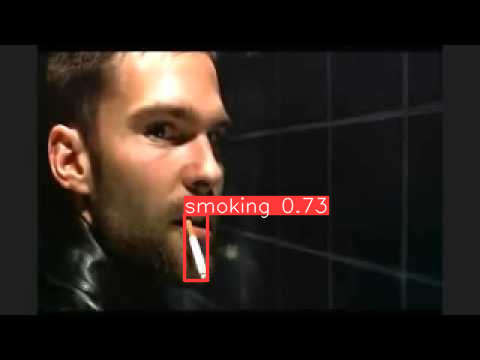

In [3]:
import torch
from PIL import Image

# Load YOLOv5 weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

# read image file
image = Image.open('000000.jpg')

# Perform object detection
results = model(image)

# Show test results
results.show()


In [1]:
import cv2
import torch
import numpy as np

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

# Set the confidence threshold for object detection
conf_threshold = 0.5

# Open video file
cap = cv2.VideoCapture('smoking.mp4')

while True:
    # Read the frame from the video file
    ret, frame = cap.read()

    # Check if frame was successfully read
    if not ret:
        break

    # Perform object detection on the frame
    results = model(frame)

    # Filter detections by confidence threshold
    detections = results.xyxy[0]
    detections = detections[detections[:, 4] > conf_threshold]

    # Draw bounding boxes around detected objects
    for detection in detections:
        xmin, ymin, xmax, ymax, confidence, class_id = detection.tolist()
        cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        cv2.putText(frame, f'{model.names[int(class_id)]}: {confidence:.2f}', (int(xmin), int(ymin-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Display the output frame
    cv2.imshow('YOLOv5 Object Detection', frame)

    # Check for 'q' key to exit
    if cv2.waitKey(1) == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\32631/.cache\torch\hub\master.zip
YOLOv5  2023-5-9 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 


requirements: C:\Users\32631\.cache\torch\hub\requirements.txt not found, check failed.


Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
